# Plot FactorsMap of NACT samples hallmark NES

Script related to figure 1d

### Aim:
- Plot Hallmark NES PCA factors map

In [2]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Get sample labels

### Load file

In [4]:
file_keys = home + 'Data/5/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [5]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


## Load ssGSEA results

In [6]:
file_nes = home + 'Data/5/HallmarksStromaImmune_NACT_NES.txt'

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [7]:
data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.092696,0.159109,0.221560,0.210024,0.099785,0.118758,0.100212,0.272152,0.108368,0.099014,...,0.166682,0.180770,0.182044,0.123420,0.167660,0.177934,0.175181,0.249246,0.163605,0.283639
HALLMARK_HYPOXIA,0.186010,0.196143,0.214819,0.237168,0.192770,0.204423,0.165283,0.278923,0.201645,0.195268,...,0.213112,0.231052,0.221524,0.238599,0.243462,0.232689,0.204692,0.258383,0.231907,0.286908
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.255208,0.282680,0.285083,0.260298,0.321267,0.309121,0.292943,0.313486,0.286084,0.277111,...,0.322881,0.262719,0.292338,0.381793,0.237000,0.292132,0.267533,0.301603,0.295406,0.393218
HALLMARK_MITOTIC_SPINDLE,0.305218,0.317705,0.293826,0.255306,0.278673,0.302507,0.298289,0.265211,0.338190,0.302091,...,0.292191,0.312170,0.317407,0.400398,0.324670,0.305270,0.306001,0.298000,0.302720,0.303047
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.218775,0.238017,0.212214,0.256485,0.252541,0.250670,0.242941,0.173667,0.262190,0.294071,...,0.245270,0.289621,0.233977,0.296323,0.177104,0.233127,0.223970,0.227052,0.261404,0.235832


### Check empty cells

In [8]:
set(data_nes.isnull().sum())

{0}

## Load mRNA tumour cellularity data

In [9]:
mRNA_tumcell_file = home + 'Data/5/NACT_log2exp_loess_norm_filtered_ESTIMATE.txt'

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,150.243978,100.962227,967.051900,808.453034,-65.569315,489.893858,490.720381,1061.377025,235.450362,418.150347,...,263.744096,464.939728,802.734452,153.081049,1103.804616,579.702569,788.616732,1237.456125,887.344608,501.153545
ImmuneScore,176.145317,526.978700,1297.193578,1203.727348,131.468582,650.323221,407.055460,1082.029608,88.028614,282.209677,...,481.526245,516.592649,582.005013,29.396052,908.321033,258.334588,849.462145,1496.053219,969.848566,621.394231
ESTIMATEScore,326.389295,627.940928,2264.245478,2012.180381,65.899267,1140.217080,897.775841,2143.406633,323.478976,700.360025,...,745.270341,981.532377,1384.739465,182.477100,2012.125649,838.037157,1638.078877,2733.509343,1857.193174,1122.547776
TumorPurity,0.794327,0.766668,0.591924,0.621334,0.816969,0.716267,0.740642,0.606127,0.794586,0.759799,...,0.755497,0.732326,0.690764,0.806982,0.621341,0.746506,0.663403,0.535046,0.638998,0.718075


### Add mRNA tumour cellularity to NES dataframe

In [10]:
data_nes_t = data_nes.T

#### Multiply purity times a small number to reduce it's impact in the PCA

In [11]:
data_nes_t['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity'] * 0.0001

In [12]:
data_nes = data_nes_t.T 

In [13]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_KRAS_SIGNALING_DN,-0.111366,-0.116319,-0.122007,-0.096597,-0.106269,-0.118997,-0.102549,-0.109274,-0.136147,-0.115405,...,-0.139325,-0.162815,-0.121599,-0.190920,-0.141080,-0.111751,-0.141831,-0.126286,-0.127925,-0.167178
HALLMARK_PANCREAS_BETA_CELLS,-0.146457,-0.171530,-0.229520,-0.139607,-0.137008,-0.151976,-0.239809,-0.162335,-0.164499,-0.187457,...,-0.228200,-0.152731,-0.218332,-0.196034,-0.157134,-0.126800,-0.179381,-0.216867,-0.193094,-0.209325
StromalSignature,0.068301,0.070667,0.269651,0.224186,0.023423,0.157401,0.155407,0.292664,0.095977,0.135368,...,0.104112,0.155909,0.228005,0.088713,0.296492,0.180196,0.221126,0.332099,0.245865,0.172484
ImmuneSignature,0.074691,0.169467,0.345730,0.317359,0.069114,0.197182,0.135779,0.299572,0.063372,0.103880,...,0.153753,0.167914,0.175292,0.058984,0.256096,0.108475,0.235833,0.393539,0.265829,0.201392
TumourCellularity_mRNA,0.000079,0.000077,0.000059,0.000062,0.000082,0.000072,0.000074,0.000061,0.000079,0.000076,...,0.000076,0.000073,0.000069,0.000081,0.000062,0.000075,0.000066,0.000054,0.000064,0.000072


### Visulase NES

#### Samples

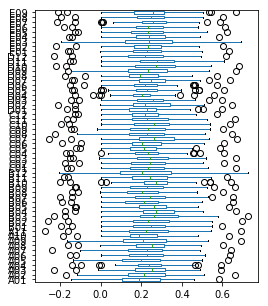

In [14]:
data_nes.plot(kind='box',
              vert=False,
              figsize=(4,5))

#### Variables

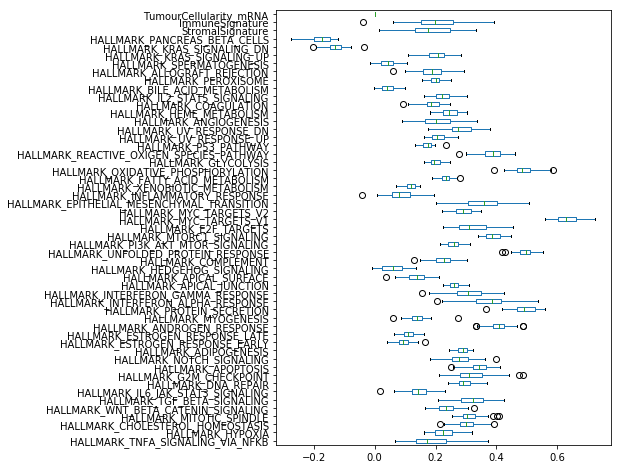

In [15]:
data_nes.transpose().plot(kind='box',
                          vert=False,
                          figsize=(6,8))

## Calculate and plot Factors Map

### Define gene set colors

In [16]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'HALLMARK_INTERFERON_ALPHA_RESPONSE':           GREEN,
'HALLMARK_INTERFERON_GAMMA_RESPONSE':           GREEN,
'ImmuneSignature':                              GREEN,
'HALLMARK_E2F_TARGETS':                         RED,
'HALLMARK_SPERMATOGENESIS':                     GREY,
'HALLMARK_INFLAMMATORY_RESPONSE':               GREEN,
'HALLMARK_G2M_CHECKPOINT':                      RED,
'HALLMARK_PANCREAS_BETA_CELLS':                 GREY,
'HALLMARK_OXIDATIVE_PHOSPHORYLATION':           GREY,
'HALLMARK_MYC_TARGETS_V1':                      RED,
'HALLMARK_FATTY_ACID_METABOLISM':               GREY,
'HALLMARK_PEROXISOME':                          GREY,
'HALLMARK_DNA_REPAIR':                          RED,
'HALLMARK_UNFOLDED_PROTEIN_RESPONSE':           'purple',
'HALLMARK_KRAS_SIGNALING_DN':                   RED,
'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY':     'purple',
'HALLMARK_CHOLESTEROL_HOMEOSTASIS':             GREY,
'HALLMARK_COMPLEMENT':                          GREEN,
'HALLMARK_MTORC1_SIGNALING':                    RED,
'HALLMARK_IL2_STAT5_SIGNALING':                 GREEN,
'HALLMARK_ADIPOGENESIS':                        GREY,
'HALLMARK_KRAS_SIGNALING_UP':                   RED,
'HALLMARK_HEME_METABOLISM':                     GREY,
'HALLMARK_PI3K_AKT_MTOR_SIGNALING':             RED,
'HALLMARK_ANDROGEN_RESPONSE':                   GREY,
'HALLMARK_PROTEIN_SECRETION':                   GREY,
'HALLMARK_P53_PATHWAY':                         RED,
'HALLMARK_UV_RESPONSE_UP':                      'purple',
'HALLMARK_MYC_TARGETS_V2':                      RED,
'StromalSignature':                             BLUE,
'HALLMARK_MITOTIC_SPINDLE':                     RED,
'HALLMARK_GLYCOLYSIS':                          RED,
'HALLMARK_APICAL_JUNCTION':                     BLUE,
'HALLMARK_HYPOXIA':                             'purple',
'HALLMARK_TNFA_SIGNALING_VIA_NFKB':             GREEN,
'HALLMARK_APOPTOSIS':                           GREY,
'HALLMARK_APICAL_SURFACE':                      GREY,
'HALLMARK_UV_RESPONSE_DN':                      'purple',
'HALLMARK_TGF_BETA_SIGNALING':                  'purple',
'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':   BLUE,
'HALLMARK_NOTCH_SIGNALING':                     RED,
'HALLMARK_WNT_BETA_CATENIN_SIGNALING':          RED,
'HALLMARK_ALLOGRAFT_REJECTION':                 GREEN,
'HALLMARK_XENOBIOTIC_METABOLISM':               GREY,
'HALLMARK_ANGIOGENESIS':                        BLUE,
'HALLMARK_BILE_ACID_METABOLISM':                GREY,
'HALLMARK_COAGULATION':                         GREY,
'HALLMARK_ESTROGEN_RESPONSE_EARLY':             GREY,
'HALLMARK_ESTROGEN_RESPONSE_LATE':              GREY,
'HALLMARK_HEDGEHOG_SIGNALING':                  RED,
'HALLMARK_IL6_JAK_STAT3_SIGNALING':             GREEN,
'HALLMARK_MYOGENESIS':                          GREY,
'TumourCellularity_mRNA':                       'k'
}

### Separate matched and unmatched samples

In [17]:
matched = [3368,371,9717,8674,2359,564,7765,6965,9347]

matched_df = sample_labels[sample_labels['Case_mRNA'].isin(matched)]

unmatched_df = sample_labels[~sample_labels['Case_mRNA'].isin(matched)]

In [18]:
matched_nes_df = data_nes[matched_df.index]

unmatched_nes_df = data_nes[unmatched_df.index]

## Calculate matched PCA

In [19]:
pca = PCA(n_components=7)

In [20]:
pca_nes = pca.fit_transform(matched_nes_df.transpose())

In [21]:
len(pca_nes) # check number of data points

18

### Dump components relations with features

In [22]:
components = pd.DataFrame(pca.components_,
                          columns=matched_nes_df.transpose().columns)

In [23]:
components.head()

Term,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,...,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS,StromalSignature,ImmuneSignature,TumourCellularity_mRNA
0,-0.259410,-0.112656,-0.030129,0.008677,0.076517,-0.105509,-0.202778,-0.000908,0.087049,-0.140535,...,-0.057594,-0.013277,-0.209434,0.077004,-0.155825,0.031212,0.003793,-0.334310,-0.438957,0.000034
1,-0.037033,0.017334,0.143957,0.181590,0.009712,0.074727,0.048049,0.207364,0.433047,0.078384,...,-0.095865,0.044840,0.078547,0.013921,-0.019258,-0.107871,-0.195049,-0.109249,-0.066437,0.000010
2,0.157669,0.000133,0.010972,-0.158320,-0.023859,-0.047592,0.094143,-0.085460,-0.053082,-0.015806,...,-0.005979,0.067273,0.080658,0.105277,0.031800,0.158704,0.180289,-0.289622,0.161874,0.000003
3,-0.313670,-0.163528,-0.021165,0.066182,0.203646,-0.274316,0.061289,-0.076103,-0.039681,0.064755,...,-0.053496,0.007618,0.011605,-0.072817,-0.044432,-0.124975,-0.043376,0.137366,0.013483,-0.000007
4,-0.221030,-0.088184,-0.040130,0.039807,0.355034,-0.365942,-0.070629,0.001966,-0.090572,-0.129435,...,0.058318,0.179656,-0.023850,0.143900,0.027053,0.003288,-0.189982,0.193265,0.024468,-0.000009


### Arrow colour

In [24]:
color_arrow = [color_sets[h] for h in components.columns.values]

### Plot

In [25]:
pcx = 0
pcy = 1

In [26]:
hallmark_text = 'KRAS'
loading1 = 0.0 # low
loading2 = 0.05 # high

HALLMARK_KRAS_SIGNALING_UP -0.15582523383838437 -0.019258048128518713
7.045316266283123
HALLMARK_KRAS_SIGNALING_DN 0.031212323295852884 -0.10787064388971666
-73.86222339790758


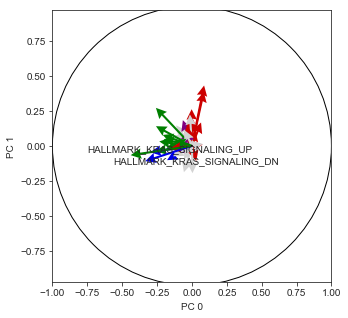

In [27]:
lim=1
sns.set_style('ticks')
PCs = pca.components_

fig = plt.figure(figsize=(5,5))

plt.quiver(np.zeros(PCs.shape[1]),
           np.zeros(PCs.shape[1]),
           PCs[pcx,:], PCs[pcy,:],
           angles='xy',
           scale_units='xy',
           scale=1,
           color=color_arrow,
           edgecolor='None',
           alpha=1,
           headwidth=5,
           headlength=5,
           headaxislength=4.5,
           minshaft=1,
           minlength=1,
           lw=1)

# Add labels based on feature names (here just numbers)
feature_names = components.columns.values
for i,j,z in zip(PCs[pcy,:], PCs[pcx,:], feature_names):
    
    if hallmark_text == 'all' and j > 0 and i < 0:
        
        if loading1 < np.abs(j) < loading2 or loading1 < np.abs(i) < loading2: 
        
            plt.text(j, i, z, ha='center', va='center')
            print(z, j, i)
            
            if j > 0:
                print(math.degrees(math.atan2(i, j)))
            else:
                d  = math.degrees(math.atan2(i, j))
                d2 = d + 180
                print(d2)
    
    elif hallmark_text in z:
        
        plt.text(j, i, z, ha='center', va='center')
        print(z, j, i)
        
        if j > 0:
            print(math.degrees(math.atan2(i, j)))
        else:
            d  = math.degrees(math.atan2(i, j))
            d2 = d + 180
            print(d2)

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='k')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-lim,lim])
plt.ylim([-lim,lim])

# Label axes
pc_x='PC %i' % pcx
pc_y='PC %i' % pcy
plt.xlabel(pc_x)
plt.ylabel(pc_y)

# Done
plt.show()

### Save plot

In [28]:
file_name = '../../Figures/main/5/5d_NACT_matched_Hallmarks_FM_%s_%s_%s.pdf' % (pcx,pcy,hallmark_text)

fig.savefig(file_name,
            bbox='tight')

## Calculate unmatched PCA

In [29]:
pca = PCA(n_components=7)

In [30]:
pca_nes = pca.fit_transform(unmatched_nes_df.transpose())

In [31]:
len(pca_nes) # check number of data points

38

### Dump components relations with features

In [32]:
components = pd.DataFrame(pca.components_,
                          columns=unmatched_nes_df.transpose().columns)

In [33]:
components.head()

Term,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,...,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS,StromalSignature,ImmuneSignature,TumourCellularity_mRNA
0,-0.269423,-0.130122,0.026158,0.024647,0.000912,-0.108252,-0.233156,0.033632,0.116258,-0.133944,...,-0.008876,-0.032706,-0.199412,0.024886,-0.148326,0.011204,0.037248,-0.367998,-0.401150,0.000033
1,-0.091434,-0.106604,-0.232474,-0.214954,-0.170931,-0.248924,0.002412,-0.174453,-0.301876,-0.155838,...,0.036429,-0.058782,-0.003909,0.023265,-0.014159,0.185148,0.113654,0.111218,0.109671,-0.000012
2,0.227621,0.217186,0.101469,-0.035953,0.007197,0.237330,-0.136459,-0.015270,-0.164894,0.042526,...,0.037845,-0.039292,-0.221847,-0.083759,0.038763,-0.047330,0.086526,0.047064,-0.222452,0.000009
3,0.229854,0.004306,0.085502,-0.162917,-0.004602,0.077655,0.098014,-0.054597,-0.305833,0.033218,...,0.156386,0.051928,0.029176,-0.093136,-0.092922,0.033717,0.141789,-0.333156,0.063888,0.000013
4,0.277632,0.081962,0.140692,0.015696,0.047852,-0.141835,0.137864,0.061840,0.139323,0.038013,...,0.040000,0.049685,0.060367,0.164028,0.109431,0.053582,0.151341,-0.251689,0.161098,0.000002


### Arrow colour

In [34]:
color_arrow = [color_sets[h] for h in components.columns.values]

### Plot

In [35]:
pcx = 0
pcy = 1

In [36]:
hallmark_text = 'OXIGEN'
loading1 = 0.15 # low
loading2 = 0.25 # high

HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY -0.07913272880977071 -0.1977669999650381
68.19211500336067


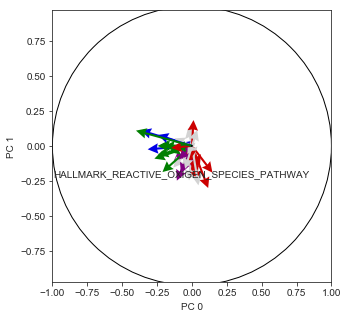

In [37]:
lim=1
sns.set_style('ticks')
PCs = pca.components_

fig = plt.figure(figsize=(5,5))

plt.quiver(np.zeros(PCs.shape[1]),
           np.zeros(PCs.shape[1]),
           PCs[pcx,:], PCs[pcy,:],
           angles='xy',
           scale_units='xy',
           scale=1,
           color=color_arrow,
           edgecolor='None',
           alpha=1,
           headwidth=5,
           headlength=5,
           headaxislength=4.5,
           minshaft=1,
           minlength=1,
           lw=1)

# Add labels based on feature names (here just numbers)
feature_names = components.columns.values
for i,j,z in zip(PCs[pcy,:], PCs[pcx,:], feature_names):
    
    if hallmark_text == 'all' and j < 0 and i < 0:
        
        if loading1 < np.abs(j) < loading2 or loading1 < np.abs(i) < loading2: 
        
            plt.text(j, i, z, ha='center', va='center')
            print(z, j, i)
            
            if j > 0:
                print(math.degrees(math.atan2(i, j)))
            else:
                d  = math.degrees(math.atan2(i, j))
                d2 = d + 180
                print(d2)
    
    elif hallmark_text in z:
        
        plt.text(j, i, z, ha='center', va='center')
        print(z, j, i)
        
        if j > 0:
            print(math.degrees(math.atan2(i, j)))
        else:
            d  = math.degrees(math.atan2(i, j))
            d2 = d + 180
            print(d2)

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='k')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-lim,lim])
plt.ylim([-lim,lim])

# Label axes
pc_x='PC %i' % pcx
pc_y='PC %i' % pcy
plt.xlabel(pc_x)
plt.ylabel(pc_y)

# Done
plt.show()

### Save plot


In [38]:
file_name = '../../Figures/main/5/panels/5d_NACT_unmatched_Hallmarks_FM_%s_%s_%s.pdf' % (pcx,pcy,hallmark_text)

fig.savefig(file_name, bbox='tight')

# End script